# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №3: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 8 апреля 2019, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 8 апреля, -4 балла после 06:00 15 апреля, -6 баллов после 06:00 22 апреля  -8 баллов после 06:00 29 апреля.

При отправлении ДЗ указывайте фамилию в названии файла<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



*** Что почитать по теории ***

Одна из лучших книг по ML $-$ "Pattern Recognition and Machine Learning" Bishop, Christopher. 

Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***

$$ w_i^k = w_{i-1}^k-\alpha\left[\frac{2}{N}\sum \limits_{i}^{n} x_{i}^k(a_i-y_i) +  \frac{2}{C}w^k_{i-1}\right]$$

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

***Ваше решение здесь***

$$ w_i^k = w_{i-1}^k-\alpha\left[\frac{1}{N}\sum \limits_{i}^{n} x_{i}^k(a_i-y_i)  +  \frac{2}{C}w^k_{i-1}\right]$$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией

Для модели с L2 регуляризацией:
$w = (X^TX + \alpha E)^{-1}X^TY $. 

***Ваше решение здесь***

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

$$\frac {dE(L | x_i)}{da(x_i)} = - \frac{p(y_i = 1 |x_i )}{a(x_i)}  + \frac{p(y_i = 0 | x_i)}{1 - a(x_i)}$$

$$ - \frac{p(y_i = 1 |x_i )}{a(x_i)}  + \frac{p(y_i = 0 | x_i)}{1 - a(x_i)} = 0$$

$$ p(y_i = 1 |x_i )(1-a(x_i))  - p(y_i = 0 | x_i)a(x_i) = 0$$

$$ a(x_i) = p(y_i = 1 | x_i) $$

#  Реализация линейной модели (5 баллов)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [18]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [19]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [20]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [21]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [22]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    
    n = X.shape[0]
    if shuffle:
        inds = np.random.permutation(n)
    else:
        inds = np.arange(n)
    for i in range(0, n, batch_size):
        X_batch = X[inds[i:i + batch_size]]
        y_batch = y[inds[i:i + batch_size]]
        yield (X_batch, y_batch)
    

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [23]:
#%%pycodestyle

def sigmoid(X):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    
    return 1 / (1 + np.exp(-X))


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg', batch_size=1):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.batch_size = batch_size
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        a = sigmoid(X_batch.dot(self.weights)) 
        R = np.sum(self.weights**2)/self.C
        N = X_batch.shape[0]
        if self.model_type == 'log_reg':
            return -(1/N)*np.sum(y_batch*np.log(a)+(1-y_batch)*np.log(1-a))+R
        if self.model_type == 'lin_reg':
            return (1/N)*np.sum((y_batch - a)**2) + R
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        a = sigmoid(X_batch.dot(self.weights))
        N = X_batch.shape[0]
        if self.model_type == 'log_reg':
            #print((1-y_batch).shape, X_batch.shape)
            return ((1/N)*(1/N)*(a-y_batch).dot(X_batch)+(2/self.C)*self.weights)
        if self.model_type == 'lin_reg':
            return ((2/N)*(a-y_batch).dot(X_batch)+(2/self.C)*self.weights)
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        #print(self.weights.shape, new_grad.shape)
        self.weights -= self.alpha * new_grad
       
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.weights = np.random.uniform(0, 1, X.shape[1])
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        if model_type == 'log_reg':
            X = np.hstack((np.ones((X.shape[0], 1)), X))
            return (sigmoid(X.dot(self.weights)) >= 0.5).astype(int)
        if model_type == 'lin_reg':
            X = np.hstack((np.ones((X.shape[0], 1)), X))
            return int(np.dot(X, self.weights))
        
        
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [24]:
def plot_decision_boundary(clf):
    a = clf.weights
    x = np.linspace(-2, 6, 2)
    y = -(a[0] + a[1]*x)/a[2]
    plt.plot(x, y, label='model = {}'.format(clf.model_type))
    
    plt.legend()

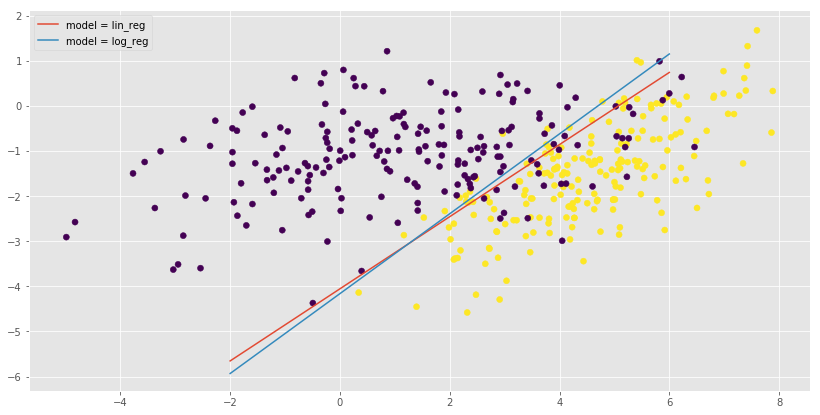

In [25]:
np.random.seed(0)
plt.figure(figsize=(14, 7))

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

myclf = MySGDClassifier(batch_generator, C=10000, max_epoch=50, model_type='lin_reg')
myclf.fit(X, y)
plot_decision_boundary(myclf)
myclf = MySGDClassifier(batch_generator, C=10000, max_epoch=50, model_type='log_reg')
myclf.fit(X, y)
plot_decision_boundary(myclf)

plt.scatter(X[:,0], X[:,1], c=y)


Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [26]:
from sklearn.datasets import make_classification

In [27]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

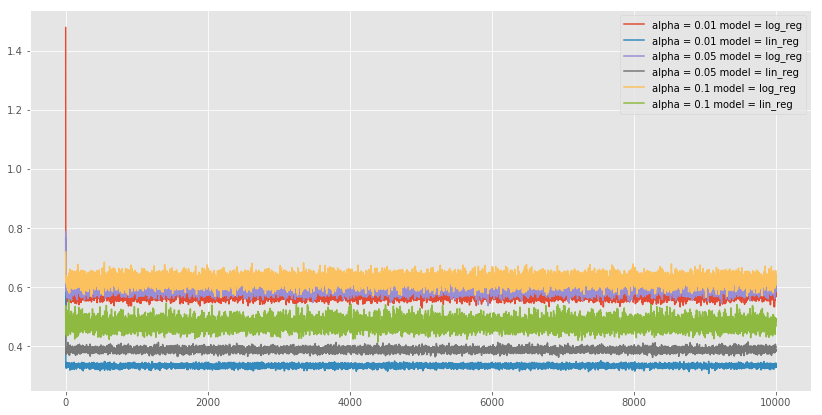

In [21]:
plt.figure(figsize=(14, 7))
alphas = (0.01, 0.05, 0.1)
N = 100

for alpha in alphas:
    myclf = MySGDClassifier(batch_generator, alpha=alpha, model_type='log_reg')
    myclf.fit(X, y)
    steps = len(myclf.errors_log['loss'])
    mean_losses = []
    for i in range(steps // N):
        s = np.sum(myclf.errors_log['loss'][i*N:(i+1)*N]) / N
        mean_losses.append(s)
        
    model_type = 'log_reg'
    plt.plot(np.arange(len(mean_losses)), mean_losses, label='alpha = {} model = {}'.format(alpha, model_type))
    
    myclf = MySGDClassifier(batch_generator, alpha=alpha, model_type='lin_reg')
    myclf.fit(X, y)
    steps = len(myclf.errors_log['loss'])
    mean_losses = []
    for i in range(steps // N):
        s = np.sum(myclf.errors_log['loss'][i*N:(i+1)*N]) / N
        mean_losses.append(s)
        
    model_type = 'lin_reg'
    plt.plot(np.arange(len(mean_losses)), mean_losses, label='alpha = {} model = {}'.format(alpha, model_type))
    
plt.legend()
plt.show()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in multiply


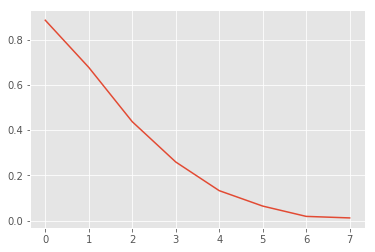

In [29]:
wghts = []
C = np.logspace(3, -3, 10)
for c in C:
    clf = MySGDClassifier(batch_generator, C=c, max_epoch=1)
    clf.fit(X, y)
    wghts.append(np.mean(np.abs(clf.weights)))
plt.plot(wghts)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in multiply
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: overflow encountered in multiply


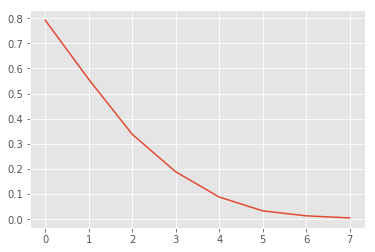

In [30]:
wghts = []
C = np.logspace(3, -3, 10)
for c in C:
    clf = MySGDClassifier(batch_generator, C=c, max_epoch=1, model_type='log_reg')
    clf.fit(X, y)
    wghts.append(np.mean(np.abs(clf.weights)))
plt.plot(wghts)

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (3  балла)

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview-2.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [78]:
doc_to_title = {}
with open('docs_titles.tsv', encoding='utf8') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [79]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [80]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [81]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [82]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    pair_id = new_doc['pair_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title, pair_id))

In [83]:
X_test = []
y_test = []
pair_ids=set()
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title_j, pair_id) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, pair_id = docs[j]
            #print(pair_id)
            pair_ids.add(pair_id)
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
X_test = np.array(X_test)
pair_ids=np.array(list(pair_ids))
groups_test = np.array(groups_test)
print (X_test.shape, groups_test.shape)

(16627, 15) (16627,)


Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [84]:
x=np.vstack((X_train,X_test))
x=StandardScaler().fit_transform(x)
print(X_train.shape, X_test.shape)
x_train=[]
x_test=[]
for i in range(len(x)):
    if i>11689:
        x_test.append(x[i])
    else:
        x_train.append(x[i])
x_train=np.array(x_train)
x_test=np.array(x_test)
print(x_train.shape, x_test.shape)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(11690, 15) (16627, 15)
(11690, 15) (16627, 15)


In [85]:
x_train1=[]
x_test1=[]
y_train1=[]
y_test1=[]
for i in range(len(x_train)):
    if groups_train[i]>40:
        x_train1.append(x_train[i])
        y_train1.append(y_train[i])
    else:
        x_test1.append(x_train[i])
        y_test1.append(y_train[i])
x_train1=np.array(x_train1)
y_train1=np.array(y_train1)
x_test1=np.array(x_test1)
y_test1=np.array(y_test1)
print(x_train1.shape, y_train1.shape, x_test1.shape, y_test1.shape)

(8066, 15) (8066,) (3624, 15) (3624,)


In [67]:
alphas=[0.0001, 0.001, 0.01]
Cs=[ 50, 100, 500, 1000,5000]
epoch=[5,10,20]
batchs=[1, 5, 10, 50, 500, 1000,5000]
for a in alphas:
    print('cur step = ', a)
    for cel in Cs:
        for ep in epoch:
            for batch in batchs:
                myclf = MySGDClassifier(batch_generator, alpha=a, C=cel,max_epoch=ep, model_type='log_reg', batch_size=batch)
                myclf.fit(x_train1, y_train1)
                sc = f1_score(y_test1, myclf.predict(x_test1))
                if sc > 0.56:
                    print("score: ", sc, a, cel, ep, batch)

cur step =  0.0001


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in multiply


score:  0.5641230523371954 0.0001 50 5 5
score:  0.5667619436504696 0.0001 50 5 50
score:  0.5701244813278008 0.0001 50 5 500
score:  0.5662751677852349 0.0001 50 5 1000
score:  0.5655644241733181 0.0001 50 5 5000
score:  0.5765326837190418 0.0001 100 5 1
score:  0.5603448275862069 0.0001 100 5 5
score:  0.5651376146788991 0.0001 100 5 50
score:  0.5682837342030167 0.0001 100 5 1000
score:  0.5804555473916237 0.0001 500 5 1
score:  0.5706099058534588 0.0001 500 5 5
score:  0.561145795078957 0.0001 500 5 10
score:  0.5651251591005516 0.0001 500 5 500
score:  0.5695473251028806 0.0001 500 5 1000
score:  0.5741935483870968 0.0001 1000 5 1
score:  0.5662431941923776 0.0001 1000 5 5
score:  0.5635767022149302 0.0001 1000 5 10
score:  0.5701960784313725 0.0001 1000 5 5000
score:  0.5749433473616057 0.0001 5000 5 1
score:  0.5707674508291554 0.0001 5000 5 5
score:  0.5734011627906976 0.0001 5000 5 500
cur step =  0.001
cur step =  0.01
score:  0.5654734934299954 0.01 50 5 1
score:  0.56693620

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


score:  0.5625 0.01 5000 10 5


In [70]:
alphas=[0.0001, 0.001, 0.01]
Cs=[ 50, 100, 500, 1000,5000]
epoch=[5,10,20]
batchs=[1, 5, 10, 50, 500, 1000,5000]
for a in alphas:
    print('cur step = ', a)
    for cel in Cs:
        for ep in epoch:
            for batch in batchs:
                myclf = MySGDClassifier(batch_generator, alpha=a, C=cel,max_epoch=ep, model_type='lin_reg', batch_size=batch)
                myclf.fit(x_train1, y_train1)
                sc = f1_score(y_test1, myclf.predict(x_test1))
                if sc > 0.55:
                    print("score: ", sc, a, cel, ep, batch)

cur step =  0.0001
score:  0.5500747384155457 0.0001 50 5 1000
score:  0.5580487804878049 0.0001 100 5 5
score:  0.5522243713733076 0.0001 100 5 500
score:  0.5519574673755437 0.0001 500 5 10
score:  0.5516209476309226 0.0001 5000 5 10
score:  0.5503159941662614 0.0001 5000 5 1000
cur step =  0.001
cur step =  0.01
score:  0.5661731718259309 0.01 50 5 10
score:  0.5746527777777778 0.01 50 5 1000
score:  0.5512637100619934 0.01 50 10 1
score:  0.5544090056285178 0.01 50 10 10
score:  0.557345971563981 0.01 50 20 5
score:  0.5585668350941663 0.01 50 20 1000
score:  0.5507944150216658 0.01 100 5 1000
score:  0.5614358030372757 0.01 100 10 5000
score:  0.5578551269990593 0.01 100 20 1000
score:  0.5539499036608864 0.01 500 5 5
score:  0.5574847489441576 0.01 500 10 1
score:  0.5548751766368347 0.01 500 10 500
score:  0.5545583372697214 0.01 500 20 5000
score:  0.5550827423167849 0.01 1000 5 50
score:  0.554709800190295 0.01 1000 5 5000
score:  0.5555555555555557 0.01 1000 10 1000
score:  0

In [71]:
X1,X2,y1,y2=train_test_split(x_tr, y_train, test_size=0.3, shuffle=False)

In [73]:
al=[0.0001, 0.001, 0.01]
Cs=[ 50, 100, 500, 1000,5000]
epoch=[5,10,20]
batchs=[1, 5, 10, 50, 500, 1000,5000]
for a in al:
    print('cur step = ', a)
    for cel in Cs:
        for ep in epoch:
            for batch in batchs:
                myclf = MySGDClassifier(batch_generator, alpha=a, C=cel,max_epoch=ep, model_type='log_reg', batch_size=batch)
                myclf.fit(X1, y1)
                sc = f1_score(y2, myclf.predict(X2))
                if sc > 0.65:
                    print("score: ", sc, a, cel, ep, batch)

cur step =  0.0001


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in multiply


score:  0.6519076778144135 0.0001 50 5 5000
score:  0.6555798687089716 0.0001 100 5 5000
score:  0.6566893424036281 0.0001 1000 5 10
score:  0.6558627264061011 0.0001 5000 5 5
cur step =  0.001
cur step =  0.01
score:  0.6570743405275778 0.01 50 5 5
score:  0.6547131147540983 0.01 50 10 1
score:  0.6556741028128031 0.01 50 20 5
score:  0.6535064935064935 0.01 50 20 5000
score:  0.6560738083034341 0.01 100 5 5
score:  0.6533742331288344 0.01 100 5 10
score:  0.656312625250501 0.01 100 10 500
score:  0.6505404014410704 0.01 100 20 10
score:  0.653250773993808 0.01 500 10 50
score:  0.6534148827726809 0.01 5000 20 50


In [76]:
al=[0.0001, 0.001, 0.01]
Cs=[ 50, 100, 500, 1000,5000]
epoch=[5,10,20]
batchs=[1, 5, 10, 50, 500, 1000,5000]
for a in al:
    print('cur step = ', a)
    for cel in Cs:
        for ep in epoch:
            for batch in batchs:
                myclf = MySGDClassifier(batch_generator, alpha=a, C=cel,max_epoch=ep, model_type='lin_reg', batch_size=batch)
                myclf.fit(X1, y1)
                sc = f1_score(y2, myclf.predict(X2))
                if sc > 0.63:
                    print("score: ", sc, a, cel, ep, batch)

cur step =  0.0001
score:  0.6344444444444444 0.0001 50 5 10
score:  0.6347177848775293 0.0001 50 5 50
score:  0.6301824212271974 0.0001 50 5 1000
score:  0.6301369863013698 0.0001 100 5 500
score:  0.635230352303523 0.0001 500 5 1
score:  0.6355340848094472 0.0001 1000 5 1
score:  0.6376172090457805 0.0001 5000 5 50
score:  0.6319253976961052 0.0001 5000 5 500
score:  0.6336 0.0001 5000 5 1000
cur step =  0.001
score:  0.6322155030236393 0.001 50 5 5000
score:  0.6358695652173912 0.001 50 10 50
score:  0.6425146510388918 0.001 100 20 5
score:  0.6311111111111111 0.001 100 20 50
score:  0.6414893617021277 0.001 1000 5 500
score:  0.6301824212271974 0.001 1000 20 10
score:  0.630422844590884 0.001 5000 5 500
cur step =  0.01
score:  0.64648537711647 0.01 50 5 1
score:  0.6455083378160302 0.01 50 5 10
score:  0.639344262295082 0.01 50 5 1000
score:  0.6309255079006773 0.01 50 5 5000
score:  0.6554541086016338 0.01 50 10 5
score:  0.6471494607087828 0.01 50 10 50
score:  0.646995708154506

In [92]:
file = open("res.csv", "wb")
file.write( bytes(str("pair_id,target\n"), "utf-8"))
myclf = MySGDClassifier(batch_generator, alpha=0.01, C=100, max_epoch=5, model_type='log_reg', batch_size=5)
myclf.fit(X1, y1)
res = myclf.predict(x_test)
for k,pair_id in enumerate(pair_ids):
    file.write(bytes(str(pair_id) + "," +str(res[k]) + str("\n"), "utf-8"))
file.close()

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна. Если да, то Вы молодец!

# Контрольные вопросы
Постарайтесь максимально развернуто и честно ответить на вопросы. Они охватывают тему линейных моделей и скорее нужны преподавателям, чтобы понимать, что именно Вы усвоили плохо. Надеюсь, они подскажут, что именно в теме Вы не понимаете или наоборот порадают, что Вы все знаете ^_^

* Опишите основные, на Ваш взгляд,  отличия логистической регрессии от линейной регрессии. Почему, на ваш взгляд, задачу классификации решают логистической, а не линейной регрессией?

***Ваше ответ здесь***

Оптимизируются разные функционалы. В задаче линейной регрессии ответ может принимать любое значение, а в логистической регрессии ответом является число в промежутке от 0 до 1.

Потому, что ответ логистической регрессии может трактоваться как вероятность принадлежности объекта к классу. Таким образом мы учитываем, то, что наша модель может ошибаться.

* Как Вы думаете, для каких типов задач (объем данных, число признаков, типы признаков) стоит отдавать предпочтение линейным моделям?

***Ваше ответ здесь***

Линейные модели используются для задач, в которых много признаков и они линейно независимы.

* Пусть на обучении мы имеем выборку размера $N$, число признаков $D$. Чему равна алгоритмическая сложность одного шага градиентного спуска? Cтохастического градиентного спуска?  Сложность предсказания на одном объекте?

***Ваше ответ здесь***

Шаг градиентного спуска - O(ND)

Шаг стохастического градиентного спуска - O(D)

Предсказание - O(D)

* В чем преимущества стохастического градиентного спуска (в том числе мини-батч) над обычным градиентным спуском? В чем его недостатки? Рассмотрите несколько аспектов $-$ скорость сходимости, необходимость загрузки всех данных в оперативную память, сложность вычисления одного шага.

***Ваше ответ здесь***

Преимущества стохастического градиентного спуска в том, что он сходитя быстрее обычного. Недостаток в том, что он немного проигрывает в качестве.

* Как Вы думаете, при обучении линейной модели с помощью SGD, ошибку на новом объекте стоит считать до итерации спуска на этом объекте или после? Почему Вы так думаете? Возможно, Вам будет интересно ознакомиться с http://hunch.net/~jl/projects/prediction_bounds/thesis/mathml/thesisse44.xml

***Ваше ответ здесь***

 Я считаю нужно считать до итерации спуска, потому что, если рассматреть первую эпоху, то для модели это будут новые данные.

* Как Вы думаете, во времена такого бума нейронных сетей, остаются ли популярными линейные модели, или это уже пережиток прошлого? Почему Вы так думаете?

***Ваше ответ здесь***


Думаю, что скорее всего да, являются одними из самых популярных засчет своей простоты и качества предсказания в некоторых задачах

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***

Курс очень интересный! получаю большое удовольствие от его изучения, хоть и дается он мне очень тяжело(